In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json

In [7]:
ts = np.arange(0, 6*np.pi, 0.2)
xs = np.concatenate([np.floor(100 * np.sin(ts) + 101).astype(np.uint8), 
                     np.floor(np.arange(100, 200, 5)).astype(np.uint8),
                     np.floor(np.arange(200, 0, -10)).astype(np.uint8),
                     np.floor(np.arange(0, 200, 5)).astype(np.uint8) ])

In [9]:
def step_invok(x: np.uint8, sys_process, silent = True):
    x_str = "{}\n".format(x)

    current_state = sys_process.stdout.readline().rstrip("\n")
    
    if not silent:
        print(current_state)

    sys_process.stdin.write(x_str)
    sys_process.stdin.flush()

    out_str = json.loads(sys_process.stdout.readline())["output"]

    out_str = out_str[out_str.find("\'d")+2:]

    return np.uint8(out_str)

sys_process = subprocess.Popen("../../build/exec/sys", 
                             stdin  = subprocess.PIPE,
                             stdout = subprocess.PIPE, 
                             stderr = subprocess.PIPE,
                             text=True,
                             shell=False)

ys = np.zeros_like(xs)

for i, x in enumerate(xs):
    y = step_invok(x, sys_process)
    ys[i] = y

sys_process.terminate()
sys_process.kill()

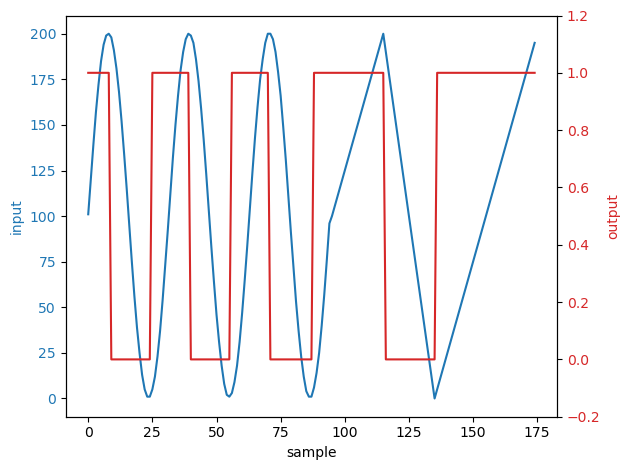

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('sample')
ax1.set_ylabel('input', color=color)
ax1.plot(xs, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('output', color=color)
ax2.plot(ys, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-0.2, 1.2])
fig.tight_layout()

In [ ]:
fig.savefig("readme_react_python_example.png", dpi=300)